In [38]:
import numpy as np 
import pandas as pd 
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns 
from constants import ROOT_DIR

# setting the path of this notebook to the root directory
sys.path.append(ROOT_DIR)
# import libraries custom in this repository
import methods.DataIO as DataIO
import methods.GromovWassersteinFramework as GWL
import dev.generate_util as Gen

sns.set()
%matplotlib inline

Gromov-Wasserstein Discrepancy

In [58]:
MM = 1000

OT_DICT = {'loss_type': 'L2',  # the key hyperparameters of GW distance
            'ot_method': 'proximal',
            'beta': 0.01,
            'outer_iteration': 3000,  # outer, inner iteration, error bound of optimal transport
            'iter_bound': 1e-30,
            'inner_iteration': 1,
            'sk_bound': 1e-30,
            'max_iter': 1,  # iteration and error bound for calcuating barycenter
            'cost_bound': 1e-16,
            'update_p': False,  # optional updates of source distribution
            'lr': 0.1,
            'node_prior': None,
            'alpha': 0,
            'test_mode': True}

In [68]:
line_g = nx.Graph(Gen.gen_line_graph(5))
star_g = nx.Graph(Gen.gen_star_graph(5))
cycle_g = nx.Graph(Gen.gen_cycle_graph(5))

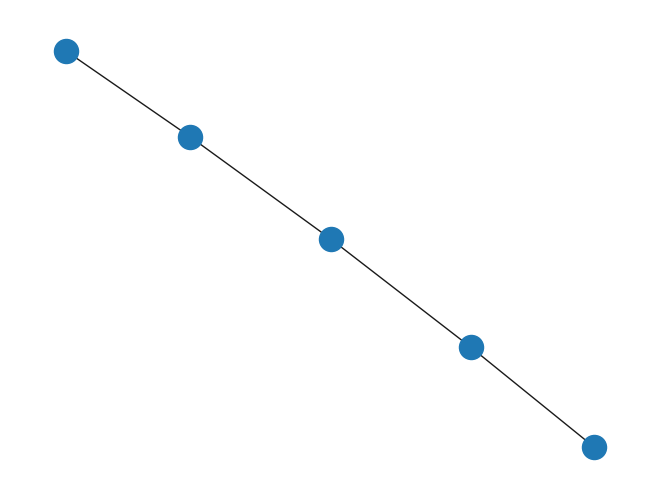

In [4]:
nx.draw(line_g)

In [74]:
def gwd_wrapper(graph, ot_dict): 
    p_s, cost_s, _ = DataIO.extract_graph_info(graph)
    p_s /= np.sum(p_s)
    cost_s = cost_s + cost_s.T
    p_t, cost_t, _ = DataIO.extract_graph_info(graph)
    p_t /= np.sum(p_t)
    cost_t = cost_t + cost_t.T
    trans = None 
    d_gw = None
    for i in range(5): 
        trans, d_gw, _ = GWL.gromov_wasserstein_discrepancy(cost_s, cost_t, p_s, p_t, ot_dict)
    return trans, d_gw

In [64]:
def display_graphics(graph, ot_dict): 
    nx.draw(graph)
    trans, d_gw = gwd_wrapper(graph, ot_dict)
    print(f"Number of iterations: {len(d_gw)}")
    print("Transport Matrix:")
    print(pd.DataFrame(trans))
    plt.figure()
    plt.imshow(trans)
    plt.colorbar()

Number of iterations: 1000
Transport Matrix:
              0             1             2             3             4
0  6.248498e-02  2.053308e-15  3.003488e-05  2.053308e-15  6.248498e-02
1  1.767083e-13  1.250000e-01  4.907561e-24  1.250000e-01  1.767083e-13
2  3.004305e-05  5.704021e-26  2.499399e-01  5.704021e-26  3.004305e-05
3  1.767083e-13  1.250000e-01  4.907561e-24  1.250000e-01  1.767083e-13
4  6.248498e-02  2.053308e-15  3.003488e-05  2.053308e-15  6.248498e-02


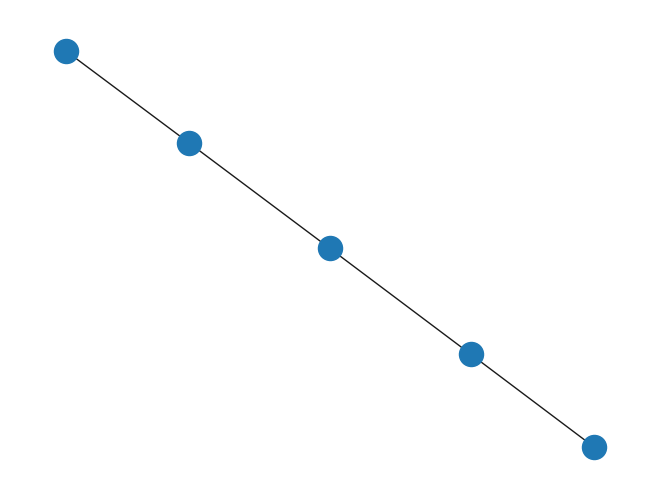

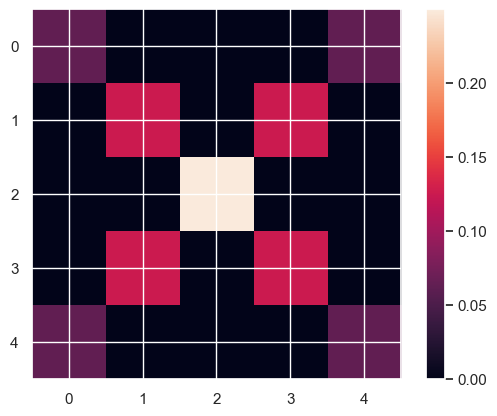

In [75]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(line_g, OT_DICT)

Number of iterations: 1
Transport Matrix:
      0     1     2     3     4
0  0.04  0.04  0.04  0.04  0.04
1  0.04  0.04  0.04  0.04  0.04
2  0.04  0.04  0.04  0.04  0.04
3  0.04  0.04  0.04  0.04  0.04
4  0.04  0.04  0.04  0.04  0.04


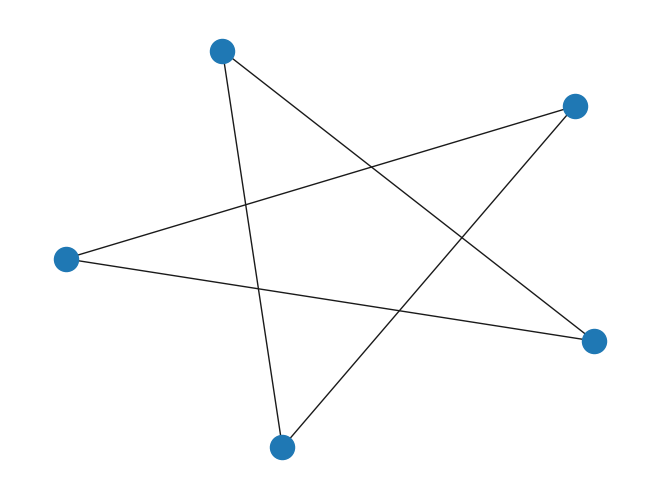

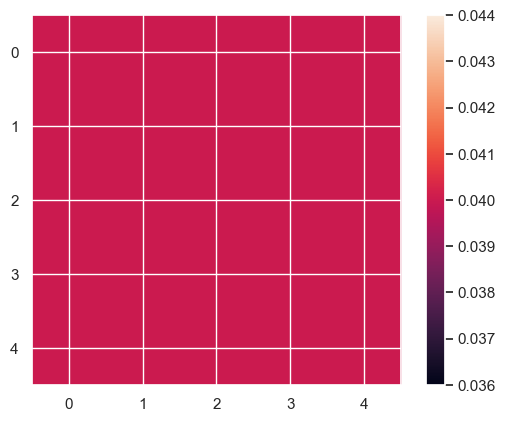

In [76]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(cycle_g, OT_DICT)

Number of iterations: 1000
Transport Matrix:
              0             1             2             3             4
0  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
1  1.250000e-01  8.508725e-10  1.250000e-01  1.250000e-01  1.250000e-01
2  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
3  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
4  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15


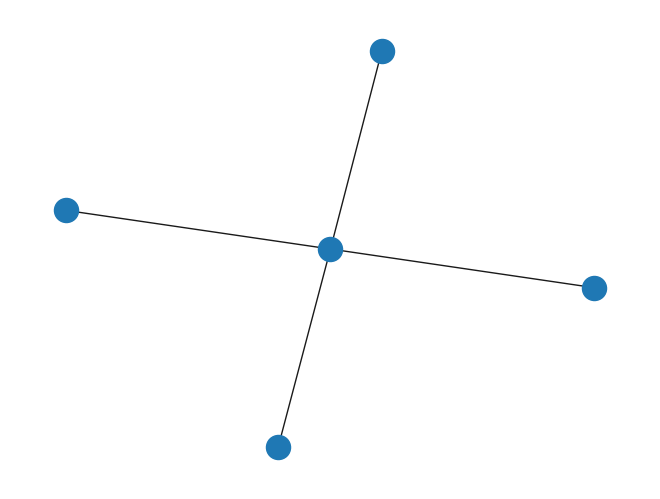

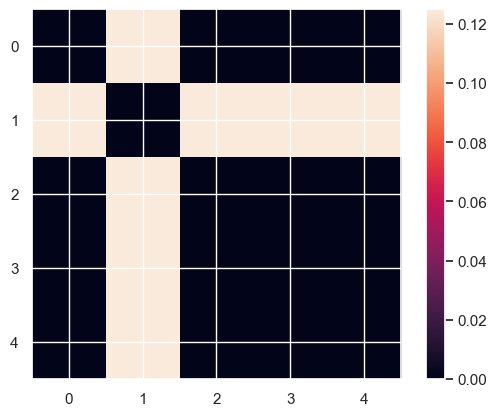

In [77]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(star_g, OT_DICT)

Number of iterations: 1000
Transport Matrix:
              0             1             2             3             4
0  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
1  1.250000e-01  8.508725e-10  1.250000e-01  1.250000e-01  1.250000e-01
2  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
3  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15
4  3.541861e-15  1.250000e-01  3.541861e-15  3.541861e-15  3.541861e-15


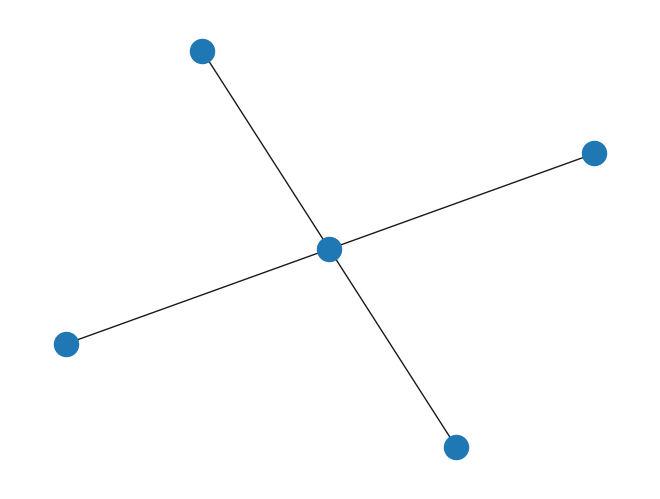

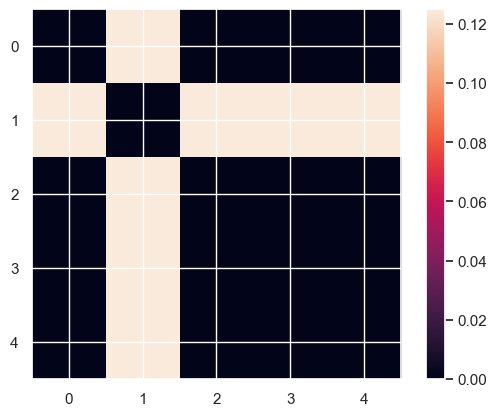

In [70]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(star_g, OT_DICT)

Number of iterations: 19
Transport Matrix:
              0             1             2             3             4
0  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
1  1.250000e-01  7.246486e-47  1.250000e-01  1.250000e-01  1.250000e-01
2  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
3  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
4  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72


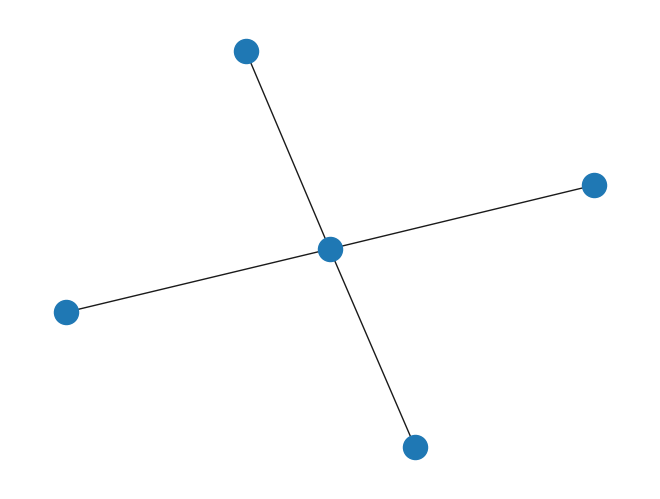

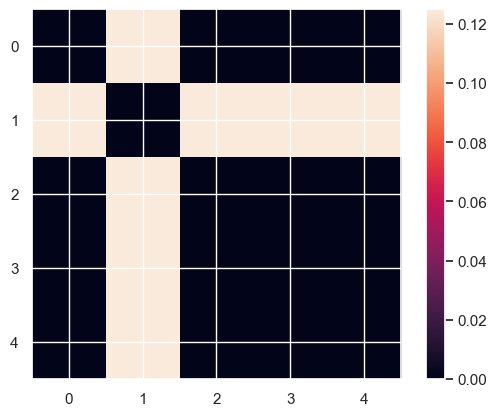

In [78]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'
display_graphics(star_g, OT_DICT)

Number of iterations: 19
Transport Matrix:
              0             1             2             3             4
0  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
1  1.250000e-01  7.246486e-47  1.250000e-01  1.250000e-01  1.250000e-01
2  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
3  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
4  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72


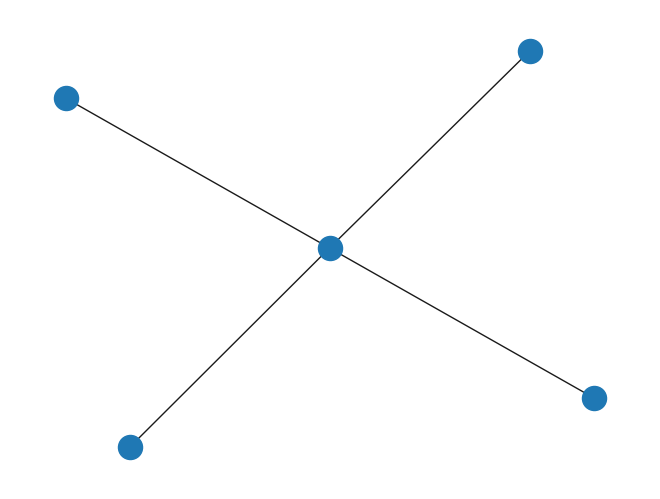

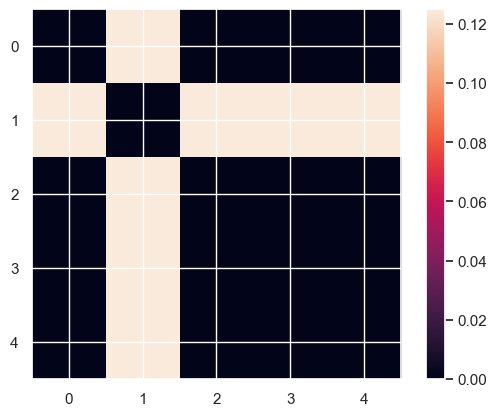

In [73]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'
display_graphics(star_g, OT_DICT)

Number of iterations: 19
Transport Matrix:
              0             1             2             3             4
0  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
1  1.250000e-01  7.246486e-47  1.250000e-01  1.250000e-01  1.250000e-01
2  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
3  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72
4  4.957226e-72  1.250000e-01  4.957226e-72  4.957226e-72  4.957226e-72


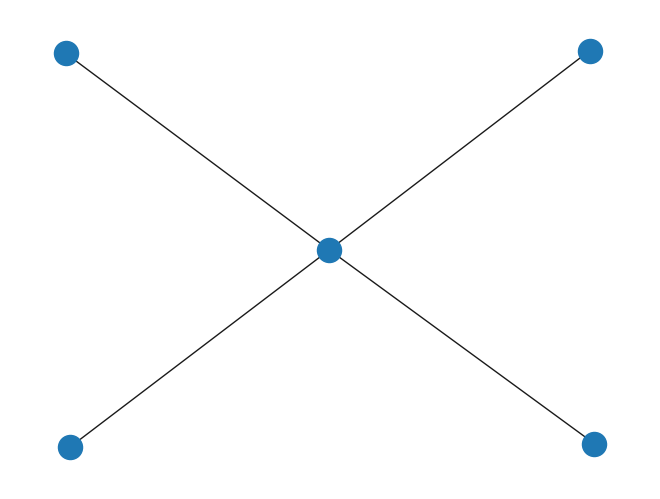

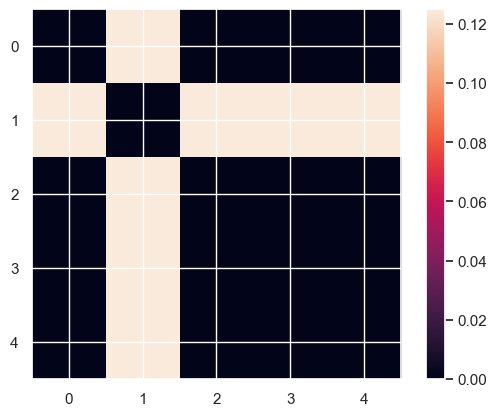

In [84]:
OT_DICT['beta'] = 0.01
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'
display_graphics(star_g, OT_DICT)

Number of iterations: 196
Transport Matrix:
              0             1             2             3             4
0  3.125000e-02  5.370394e-32  3.125000e-02  3.125000e-02  3.125000e-02
1  5.944519e-31  5.000000e-01  5.944519e-31  5.944519e-31  5.944519e-31
2  3.125000e-02  5.370394e-32  3.125000e-02  3.125000e-02  3.125000e-02
3  3.125000e-02  5.370394e-32  3.125000e-02  3.125000e-02  3.125000e-02
4  3.125000e-02  5.370394e-32  3.125000e-02  3.125000e-02  3.125000e-02


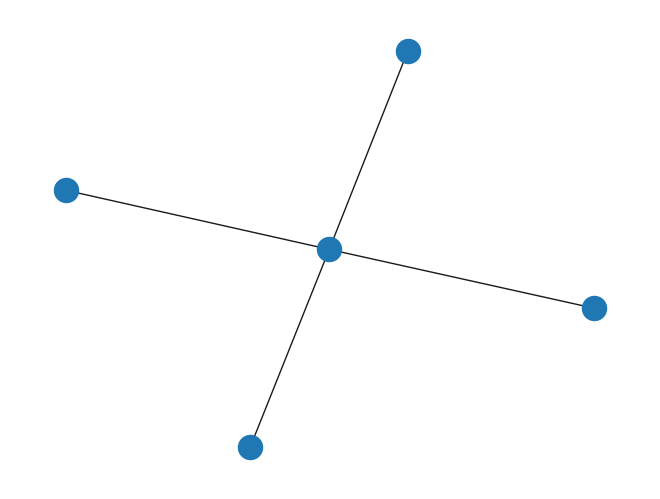

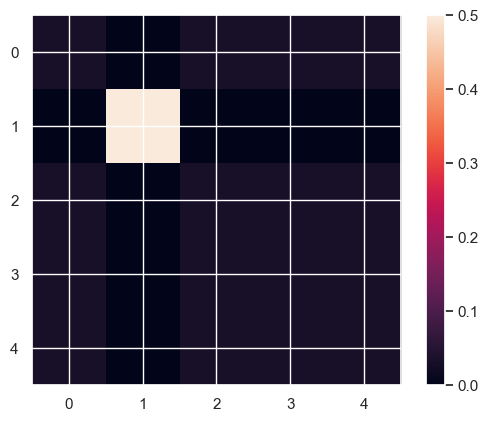

In [87]:
OT_DICT['beta'] = 10
OT_DICT['outer_iteration'] = 10
OT_DICT['inner_iteration'] = MM
OT_DICT['ot_method'] = 'b-admm'
display_graphics(star_g, OT_DICT)

Gromov-Wasserstein Distance